In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

# Descriptive statistics

### The population

At the heart of all statistics lies the study of a **statistical population** (or a **statistical model** as will be disccussed later in the course). A statistical population is the set of **all** the **individuals** about which we want to make **inferences**. These inferences are made about one or more **variables** of an individual.

Suppose for instance we want to study the expression level of a gene "geneA" in all persons with blue eyes. The statistical population would the be all individuals in the world that qualify as a person and that have blue eyes (let's say at least one blue eye). We want to make inferences about the variable "expression level of geneA".

It is clear that obtaining the expression level of geneA for the full population is not possible (at least not for now). Nevertheless, for the sake of explaination, we will act as if we have access to the full population.

The code below creates a simulated population with $N=100000$ individuals:

In [5]:
N = 100000
#the meaning of "loc" and "scale" will be made clear later
geneA_population = np.random.normal(size=N,loc=0.26,scale=0.05)

### The distribution

A histogram is a graphical representation of the distribution of (continuous) variable such as the population we created above. To construct a histogram, the first step is to bin the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The x-axis represents the bins, the y-axis represents the counts. 

We can plot a histogram of the population of geneA expression levels in python as follows:

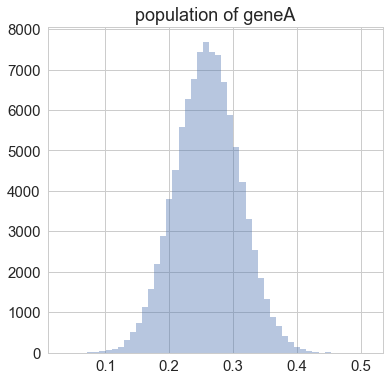

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(geneA_population,kde=False)
plt.title("population of geneA")
plt.show()

We can see that see that geneA expression levels for persons with blue eyes range between 0.5 and 4.5 with most persons having an expression level in the range between 2.4 and 2.8. We have now described the population by looking at the histogram.

The histogram reveals probabilities of ranges of the expression level. Suppose we want to know how likely it is that geneA has an expression level equal or greater than 0.3. Since I have access to the full population I can just count the number of individuals that have an expression level $\ge 0.3$ and divide by the total number of individuals in the population:

In [8]:
t = 0.3
print "p(exp_lev >= %f) = %f" % (t, float(np.sum(geneA_population>=t))/len(geneA_population))

p(exp_lev >= 0.300000) = 0.211010


So the probability that geneA's expression level is equal or greater than 0.3 is 0.21.

The distribution of the expression levels for geneA has a very common symmetric (bell-like) shape and is known as a **normal (or Gaussian) distribtion**. 

### The population parameters

The shape of a normal distribution is completely defined by it's mean $\mu$ and variance $\sigma^2$. For a population $X$ that contains $N$ individuals $x_i \in X$ with $i=1 \dots N$ the mean $\mu$ is computed as

$$\mu = \frac{1}{N}\sum_{i=1}^{N}{x_i}$$

and the variance $\sigma^2$ as

$$\sigma^2 = \frac{1}{N}\sum_{i=1}^{N}{(x_i-\mu)^2}.$$

The variance $\sigma^2$ is a measure of spread of the population. 

A more intuitive measure of spread is the **standard deviation** $\sigma=\sqrt{\sigma^2}$. It is the distance from the mean out to either saddle point in the distribution. The saddle points on each graph are where the distribution changes from concave down to concave up. 

### The sample and uncertainty

In real live we don't have access to the full population. Instead we obtain a (small) **sample** (using one of many sampling procedures) of the population and we use this sample to make inferences about the population.

Consider a sample (or **dataset**) with $n=16$ persons (or **observations**) with blue eyes randomly drawn from the population:

In [12]:
n=16

sample = np.random.choice(geneA_population,size=n)
print "my sample:"
print sample

my sample:
[ 0.30676146  0.23825668  0.30945352  0.25815694  0.33363024  0.2154292
  0.24137149  0.34518761  0.29060562  0.32255024  0.20425045  0.19141318
  0.19471878  0.29912496  0.2110003   0.27780794]


It must be noted that the formulas for the mean and variance of a sample are slightly different. For a sample $s$ that contains $n$ observations $x_i \in s$ with $i=1 \dots n$ the mean is computed as

$$\overline{x} = \frac{1}{n-1}\sum_{i=1}^{n}{x_i}$$

and the variance as

$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}{(x_i-\mu)^2}.$$

Now let's compute the mean of the population and the sample:

In [14]:
def mean_population(x):
    return np.sum(x)/float(len(x))

print "mean of population: %f" % mean_population(geneA_population)
print "mean of sample: %f" % np.mean(sample) #np.mean() computes the sample mean

mean of population: 0.259960
mean of sample: 0.264982


We see that the mean of the population does not equal the mean of the sample. Eventhough the sample was drawn at random from this population. 

If we want to make inferences about the population using the sample we need to take into account the uncertainty that is implied by a limited sample size $n<<N$. Statistics is all about quantifying this uncertainty by making assumptions about the population(s) from which one or more samples are drawn.

The mean and the variance of the population are examples of a **parameter**. Parameters are summary measures of a population and as such are **fixed**.

The sample mean and variance are known as **descriptive statistics** and are **variable** summary measures of a sample. This is  illustrated by drawing 100 samples and computing the mean for each sample:

In [15]:
n=16

sample_means = []
for i in range(100):
    sample = np.random.choice(geneA_population,size=n)
    sample_means.append(np.mean(sample))

Plotting these sample means as a histogram shows that these means differ from sample to sample:

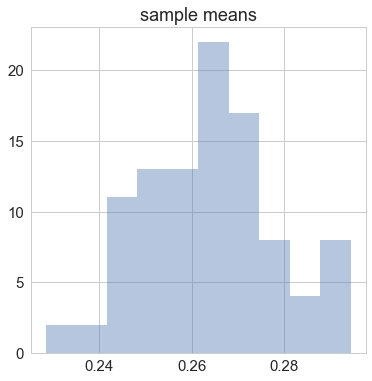

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(sample_means,kde=False,bins=10)
plt.title("sample means")
plt.show()

However, the shape of this distribution is again normal and the mean is close to the population mean:

In [17]:
print "mean of population: %f" % np.mean(geneA_population)
print "mean of sample means: %f" % np.mean(sample_means)

mean of population: 0.259960
mean of sample means: 0.263604


In fact if we increase the number of samples we draw from the population the mean of the sample mean gets very close to the sample mean:

In [21]:
n=16

sample_means = []
for i in range(100000):
    sample = np.random.choice(geneA_population,size=n)
    sample_means.append(np.mean(sample))
    
print "mean of population: %f" % np.mean(geneA_population)
print "mean of sample means: %f" % np.mean(sample_means)

mean of population: 0.259960
mean of sample means: 0.259977


### The confidence interval

The sample means follows a normal distribution and also have a standard deviation: 

In [36]:
np.std(sample_means)

0.012261805425965455

Suppose we would be able to draw all possible samples with fixed sample size $n$ then the standard deviation the sample means is known as the **standard error of the mean (SEM)** and is equal to the standard deviation of the population divided by the square root of the sample size $n$. 

As we have access to the full population we can compute the SEM as follows:

In [29]:
print "SEM using population: %f" % (np.std(geneA_population)/np.sqrt(n))

SEM using population: 0.012516


For one sample the SEM is estimated as:

$$SEM=\frac{s}{\sqrt{n}},$$

where $s$ is the standard deviation of the sample. Let's compute the SEM from just one sample:

In [30]:
n = 16

sample = np.random.choice(geneA_population,size=n)
print "SEM: %f" % (np.std(sample)/np.sqrt(n))

SEM: 0.013761


We can see that this is indeed close to the standard deviation of the population.

In fact, when we look at the formula for the SEM we see that SEM gets larger as the sample variance increases. At the same time the SEM will decrease as the sample size $n$ increases. The square root of the samples is used to decrease the impact of the sample size on the SEM as $n$ increases.

The SEM is used to compute a **confidence interval (CI)** for the mean of a population. The CI is an interval of values computed from the sample that is almost sure (set by a **level of confidence**) to cover the true population value. For instance, at a level of confidence of 95% the CI of the mean of a population is an interval of values computed from a sample drawn from this population that is 95% sure to cover the true population mean.

The CI of the mean of a population is computed using a sample $x$ from the population as 

$$[\overline{x} - t^* SEM,\overline{x} + t^* SEM],$$

where $t^*$ is a **T-statistic** that follows a **t-distribution** with $n-1$ degrees of freedom. Which t-distribution to use depends on the confidence level of the CI. For now it is sufficient to understand that the value for $t^*$ depends on the level of confidence. A more intuitive explanation of what a T-statistic is will be provided later in this course.

The following code declares a Python function that computes the confidence interval for a certain confidence level given a sample $x$:

In [31]:
import scipy as sp
import scipy.stats

def CI_mean(x, confidence=0.95):
    a = 1.0*np.array(x)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

Suppose we would draw 1000 samples from the population of geneA expression levels and compute a 95% CI for each sample uisng the formula given above. As we have access to the full population we can compute the percentage of samples for which the CI indeed contains the population mean. This should be very close to 95%:

In [36]:
population_mean = np.mean(geneA_population)

confidence = 0.95
num_samples = 1000
n = 16

num_wrong = 0
for i in range(0,num_samples):
    m,l,h = CI_mean(np.random.choice(geneA_population,size=n),confidence)
    if (l > population_mean) | (h < population_mean):
        num_wrong += 1
print "Probability that population mean is within sample CI: %f" % (1. - (float(num_wrong)/num_samples))

Probability that population mean is within sample CI: 0.948000


To conclude, as long as the population is normal, one sample can be used to quantify the uncertainty (using the CI) about the mean of the population from which the sample was drawn.